In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as sc

Initial Conditions:
  double T0 = 6.0;
  double Ye = 0.01;
  double s = 10.0;
  double tau = 7.1;

In [2]:
hf = h5py.File("SkyNet_r-process.h5")
list(hf)

['A',
 'BindingEnergy',
 'Density',
 'Dt',
 'Entropy',
 'EtaE',
 'HeatingRate',
 'Temperature',
 'Time',
 'Y',
 'Ye',
 'Z']

abundance = hf["Y"]
mass = hf["A"]
charge = hf["Z"]
index_list = []
samarium_isotopes = []
samarium_full = np.zeros(len(abundance[0]))

for i in range(len(abundance[0])):
    if charge[i] == 62:
        index_list.append(i)
        samarium_isotopes.append(mass[i])

for i in range(len(abundance[0])):
    for j in range(len(index_list)):
        samarium_full[i]+=abundance[i][index_list[j]]
        
plt.loglog(time_array,samarium_full)

74 31


Text(0.5, 1.0, 'Abundance vs Time of System for a Random Isotope')

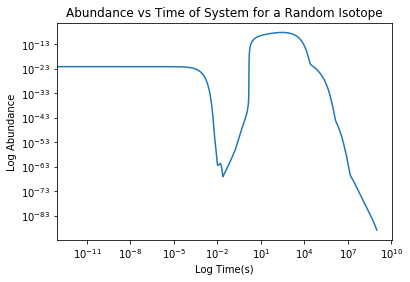

In [3]:
print(hf['A'][1000], hf['Z'][1000])
plt.loglog(hf['Time'],hf['Y'][:,1000])
plt.xlabel("Log Time(s)")
plt.ylabel("Log Abundance")
plt.title("Abundance vs Time of System for a Random Isotope")

In [4]:
k = sc.Boltzmann
time_array = hf["Time"][:]
temperature_array = hf["Temperature"][:]
energy_array = temperature_array * k * (6.242e+18) * (1e9)
energy_panda = pd.DataFrame(energy_array)
electrons = hf["Ye"][:] * hf["Density"][:]

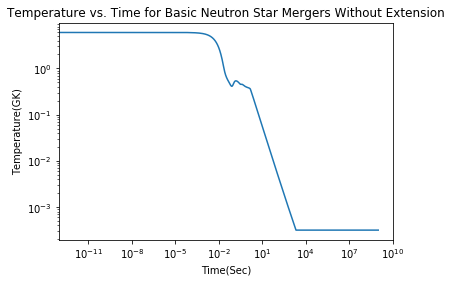

In [9]:
plt.plot(time_array,temperature_array)
plt.title("Temperature vs. Time for Basic Neutron Star Mergers Without Extension")
plt.xlabel("Time(Sec)")
plt.ylabel("Temperature(GK)")
plt.xscale('log')
plt.yscale('log')
#This is the Temperature vs. Time curve extracted from Skynet. Nothing was changed and it was run for about one minute
#To get this graph, I used python and imported the hdf5 library as the output of skynet is in the hdf5 format.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


Text(0.5, 1.0, 'Continued Temperature vs Time Plot for Log Scale')

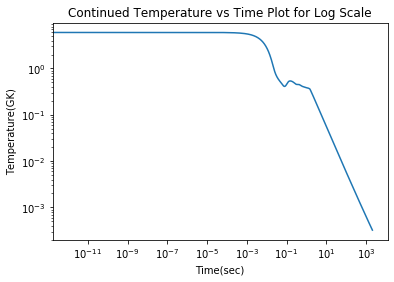

In [10]:
m = (np.log(temperature_array[1709]) - np.log(temperature_array[1708])) / np.log((time_array[1709]) - np.log(time_array[1708]))
mod_temp = []
full_temp = []
for i in range(0,len(temperature_array)):
    if i < 1710:
        mod_temp.append(np.log(temperature_array[i]))
        full_temp.append(temperature_array[i])
    else:
        mod_temp.append(np.log(temperature_array[i-1] + m))
        full_temp.append(10**mod_temp[i])

plt.figure(0)
plt.loglog(time_array,full_temp)
plt.xlabel("Time(sec)")
plt.ylabel("Temperature(GK)")
plt.title("Continued Temperature vs Time Plot for Log Scale")


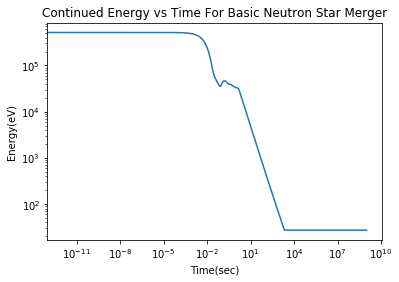

In [13]:
plt.title("Continued Energy vs Time For Basic Neutron Star Merger")
plt.plot(time_array,energy_array)
plt.ylabel("Energy(eV)")
plt.xlabel("Time(sec)")
plt.xscale('log')
plt.yscale('log')

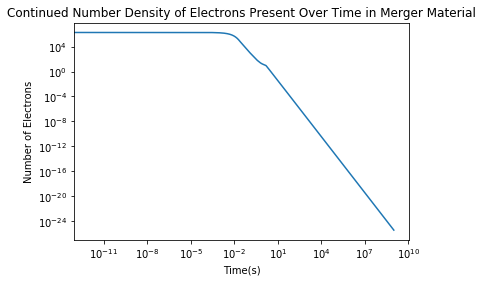

In [12]:
plt.title("Continued Number Density of Electrons Present Over Time in Merger Material")
plt.plot(time_array,electrons)
plt.xlabel("Time(s)")
plt.ylabel("Number of Electrons")
plt.xscale('log')
plt.yscale('log')

For a given ionization state, use the ionization potential to move from ni to ni+1 as a consistent value, which means that only the values for energy affect the ratio over time. Together, all the ratios will be added up together to equal 1?